In [2]:
import os
import json
from Common import ReadIni
from Common import Job

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
def coordinate_transformer(coor, sequece=True):
    if sequece == True:
        coor = coor[1:-1]
        coor = coor.split(', ')
        coordinate = []
        for c in coor:
            c = float(c[1:-1])
            coordinate.append(c)
        return coordinate
    else:
        coor = '({:.1f}, {:.2f})'.format(coor[0], coor[1])
        return coor

In [5]:
path = r'C:/Users/ccccc/PycharmProjects/Layer_Structure_Caculation\Test'

In [7]:
results_file = os.path.join(path, 'results.json')
with open(results_file, 'r') as f:
    data = json.load(f)
results = {}
coordinates = list(data.keys())
coordinates_num = [coordinate_transformer(co) for co in coordinates]

In [8]:
avdtz_results = {}
avtqz_results = {}
for co in coordinates:
    if 'final reslut avdtz' in data[co]:
        avdtz_results[co] = data[co][ 'final reslut avdtz']
        unit = data[co][ 'final reslut avdtz']['unit']
    if 'final reslut avtqz' in data[co]:
        avtqz_results[co] = data[co][ 'final reslut avtqz']

In [9]:
def morse(x, q, m, u, v):
    return (q * (np.exp(-2*m*(x-u))-2*np.exp(-m*(x-u))) + v)

def morse_fitting(distance, energy):
    t = np.linspace(1.0, 9.0)
    tstart = [  2.67307643e-02,   1.00325943e+00,   2.77132479e+00, 1.54387465e-04]
    popt, pcov = curve_fit(morse, distance, energy, p0 = tstart, maxfev = 40000000)
    yfit = morse(t, popt[0], popt[1], popt[2], popt[3])
    return yfit

def plot(yfit, energy):
    plt.plot(distance, energy, 'ro')
    plt.plot(t, yfit)
    plt.legend()
    plt.ylim([-0.03, 0.001])
    plt.ylabel('E (Hartree/atom).')
    plt.xlabel('Interlayer Distance (Å)')
    #plt.savefig("PBE0_int.png", dpi=700, bbox_inches='tight')
    
    plt.show()

In [10]:
def buckingham(x, a, b, c):
    return (a * np.exp(-b * x) - c / x**4)

def buckingham_fitting(distance, energy):
    t = np.linspace(1.0, 9.0)
    tstart = [35.28686536, 2.47335119, 3.7801102]
    popt, pcov = curve_fit(buckingham, distance, energy, p0 = tstart, maxfev = 40000000)
    yfit = buckingham(t, popt[0], popt[1], popt[2])
    print(popt)
    return yfit

In [16]:
#  PES according to layer distance
x_value = 2.5
x_coords = [ c for c in coordinates_num if c[0]==x_value]
x_coords.sort(key=lambda x: x[1])
distance = [coor[1] for coor in  x_coords]
energy_avdtz = []
energy_avtqz = []
for coor in x_coords:
    for c in coordinates:
        c_nu = coordinate_transformer(c)
        if c_nu == coor and c:
            if c in avdtz_results:
                energy_avdtz.append(avdtz_results[c]['energy'])
            if c in avtqz_results:
                energy_avtqz.append(avtqz_results[c]['energy'])

In [17]:
for i in energy_avdtz:
    i *=27
    i /= 1000
    print(i)

-0.0006519575507683031
-0.0006861653851160809
-0.0006587417568386357
-0.0006166473546425513
-0.0004641814202058683
-0.00031625969239709414
-0.00012681051140409235
-5.1587997211916876e-05
-1.2710252229437801e-05


In [12]:
morse_fitting(distance, energy_avdtz)
plot()

TypeError: plot() missing 2 required positional arguments: 'yfit' and 'energy'

C:\Users\ccccc\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


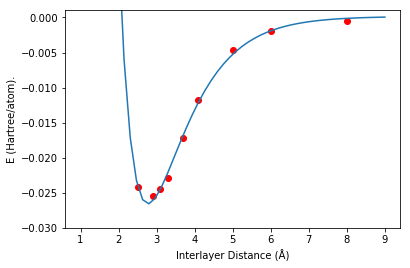

In [65]:
morse_fitting(distance, energy_avtqz)
plot()

In [75]:
# 
x = set(coor[0] for coor in coordinates_num)
x_list = list(x)
enegy_list = []
# look for the minimal energy of each x
for x in x:
    min_e = 0
    for key, value in avtqz_results.items():
        if value['x'] == x:
             if value['energy'] < min_e:
                    min_e = value['energy']
    enegy_list.append(min_e)

In [76]:
enegy_list

[-0.026797777266649895,
 -0.024939412384376185,
 -0.020506502849806887,
 -0.020323604453515824,
 -0.0183545869883323]

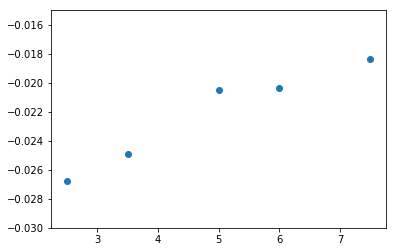

In [104]:
f1 = plt.figure(1)
plt.scatter(x_list, enegy_list)
plt.ylim([-0.03, -0.015])
plt.show()

In [103]:
energy_avtqz

[-0.0183545869883323, -0.017282144774705577, -0.01573736931495957]

[ 35.28732665   2.47335789   3.78009938]


C:\Users\ccccc\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


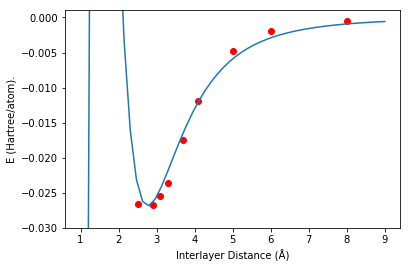

In [132]:
y_fit = buckingham_fitting(distance, energy_avdtz)
plot(y_fit, energy_avtqz)

In [124]:
popt

array([  2.67307649e-02,   1.00325934e+00,   2.77132478e+00,
         1.54388526e-04])